# Analyze the resutls

In [1]:
import os
import pandas as pd

def read_results_to_dataframe(results_folder):
    dataframes = []
    for filename in os.listdir(results_folder):
        file_path = os.path.join(results_folder, filename)
        if os.path.isfile(file_path):
            try:
                df = pd.read_csv(file_path)
                dataframes.append(df)
            except Exception as e:
                print(f"Could not read {filename}: {e}")
    if dataframes:
        return pd.concat(dataframes, ignore_index=True)
    else:
        return pd.DataFrame()

results = read_results_to_dataframe('results')
results.sample(2)

,model,seed,accuracy,f1_score,confusion_matrix,outlier_scores,time
13,knn,519,0.679641,0.613718,"[[142, 57], [50, 85]]",[1.05063515e+00 8.58413435e-01 1.53073373e+00 ...,NaN
15,knn,21415,0.661677,0.542510,"[[154, 45], [68, 67]]",[2.20651255e+00 8.64351383e-01 1.13775930e+00 ...,7829.728982


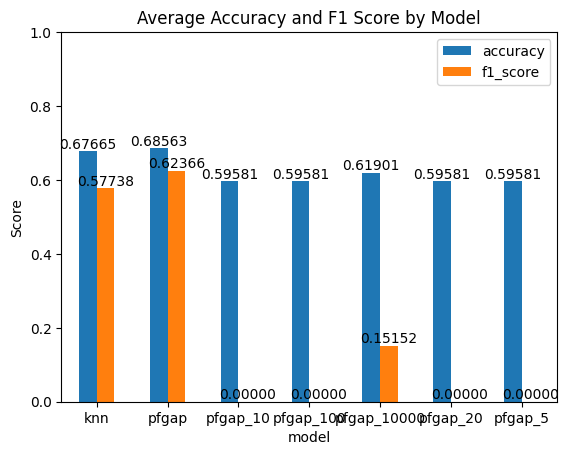

In [2]:
import matplotlib.pyplot as plt

# Group by model and calculate mean accuracy and f1_score
grouped = results.groupby('model')[['accuracy', 'f1_score']].mean()

# Plot
ax = grouped.plot(kind='bar', rot=0)
plt.ylabel('Score')
plt.title('Average Accuracy and F1 Score by Model')
plt.ylim(0, 1)

# Add numbers to the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()

In [3]:
results.sort_values("seed")

,model,seed,accuracy,f1_score,confusion_matrix,outlier_scores,time
4,pfgap,519,0.685629,0.623656,"[[142, 57], [48, 87]]","[0.00043933307613813283, 0.0007615562339274729...",NaN
13,knn,519,0.679641,0.613718,"[[142, 57], [50, 85]]",[1.05063515e+00 8.58413435e-01 1.53073373e+00 ...,NaN
6,pfgap_100,21415,0.595808,0.000000,"[[199, 0], [135, 0]]",NaN,4.424716
3,pfgap_5,21415,0.595808,0.000000,"[[199, 0], [135, 0]]",NaN,3.332511
9,pfgap_10,21415,0.595808,0.000000,"[[199, 0], [135, 0]]",NaN,3.476022
15,knn,21415,0.661677,0.542510,"[[154, 45], [68, 67]]",[2.20651255e+00 8.64351383e-01 1.13775930e+00 ...,7829.728982
19,pfgap_20,21415,0.595808,0.000000,"[[199, 0], [135, 0]]",NaN,4.069939
16,pfgap_10000,21415,0.595808,0.000000,"[[199, 0], [135, 0]]",NaN,4.203175
20,pfgap_10000,21415,0.688623,0.606061,"[[150, 49], [55, 80]]",NaN,3989.300936
1,pfgap_10,60139,0.595808,0.000000,"[[199, 0], [135, 0]]",NaN,3.525514


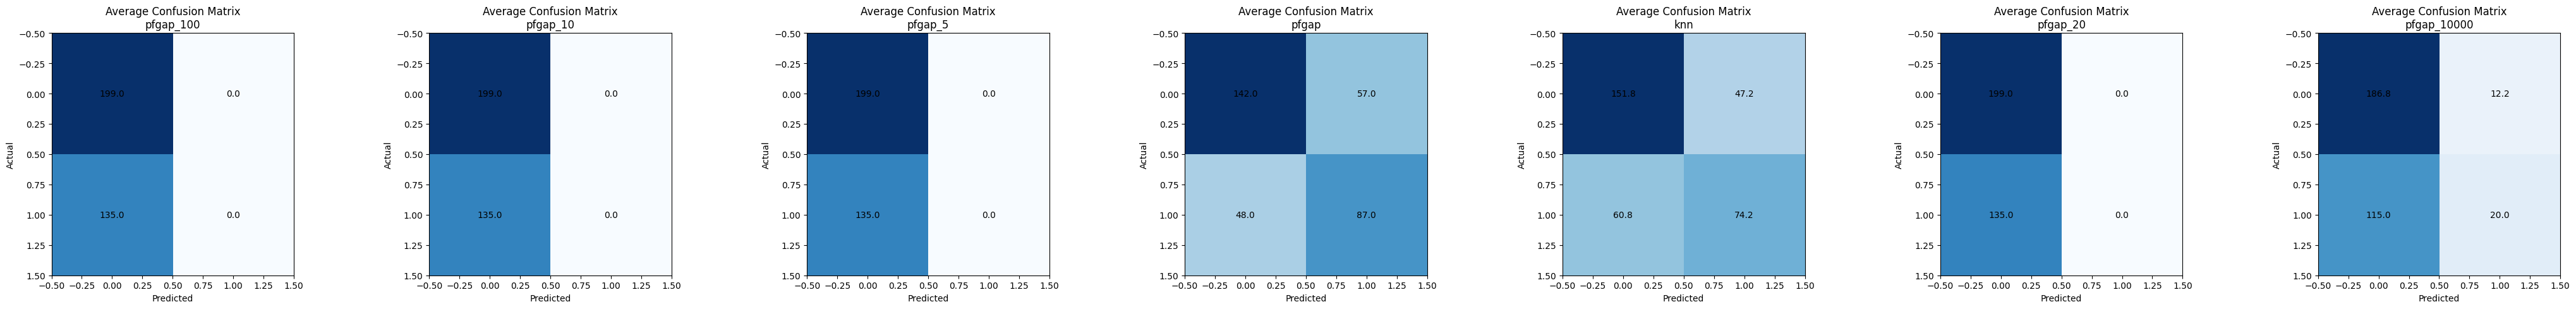

In [4]:
import numpy as np
import ast

# Calculate average confusion matrix for each model
avg_conf_matrices = {}
for model in results['model'].unique():
    matrices = results[results['model'] == model]['confusion_matrix']
    # Convert stringified lists to numpy arrays of numbers
    arrs = [np.array(ast.literal_eval(cm)) for cm in matrices]
    avg_conf_matrices[model] = np.mean(arrs, axis=0)

# Plot average confusion matrices
fig, axes = plt.subplots(1, len(avg_conf_matrices), figsize=(6 * len(avg_conf_matrices), 5))
if len(avg_conf_matrices) == 1:
    axes = [axes]
for ax, (model, avg_cm) in zip(axes, avg_conf_matrices.items()):
    im = ax.imshow(avg_cm, cmap='Blues', vmin=0)
    ax.set_title(f'Average Confusion Matrix\n{model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    for i in range(avg_cm.shape[0]):
        for j in range(avg_cm.shape[1]):
            ax.text(j, i, f'{avg_cm[i, j]:.1f}', ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

In [5]:
model_counts = results['model'].value_counts()
print(model_counts)

model
knn            4
pfgap_10000    4
pfgap_100      3
pfgap_5        3
pfgap_10       3
pfgap_20       3
pfgap          1
Name: count, dtype: int64


In [6]:
# Filter out rows with missing time values
# time_grouped = results.dropna(subset=['time']).groupby('model')['time'].mean()

# # Plot average time by model
# time_grouped.plot(kind='bar', ylabel='Average Time (s)', title='Average Time by Model', rot=0)
# plt.show()

#& Timing results
"""
KNN - 1750 on avg
PFGAP - 2192 on avg (No Parrallel, Average results)

"""

'\nKNN - 1750 on avg\nPFGAP - 2192 on avg (No Parrallel, Average results)\n\n'

ValueError: s must be a scalar, or float array-like with the same size as x and y

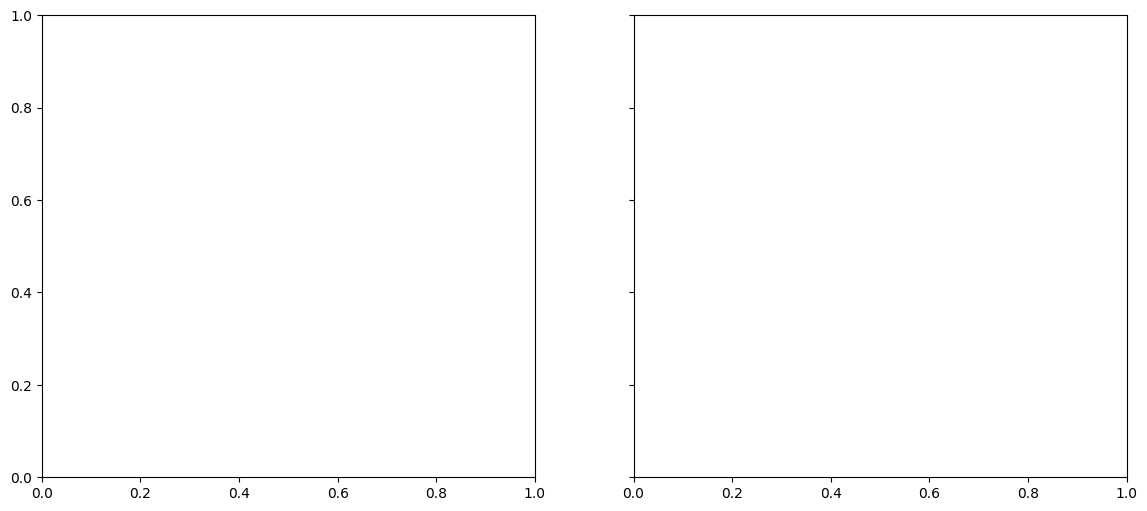

In [7]:
# --- Load Dataset ---
from torch_geometric.datasets import TUDataset
from torch_geometric.utils import to_networkx
from sklearn.model_selection import train_test_split
from sklearn.manifold import MDS


dataset_full = TUDataset(root='data/TUDataset', name='PROTEINS')
import ast

# Randomly select a seed from a row that exists for both models
valid_seeds = set(results[results['model'] == 'knn']['seed']).intersection(
    set(results[results['model'] == 'pfgap']['seed'])
)
row = results[results['seed'].isin(valid_seeds)].sample(1)
SEED = int(row['seed'].iloc[0])

# Extract outlier scores for both models and convert from string to list
scores_knn = results[(results['model'] == 'knn') & (results['seed'] == SEED)]['outlier_scores'].iloc[0]
scores_pfgap = results[(results['model'] == 'pfgap') & (results['seed'] == SEED)]['outlier_scores'].iloc[0]

# Convert string representation to list/array if necessary
if isinstance(scores_knn, str):
    try:
        # Try ast.literal_eval first (for Python list-like strings)
        scores_knn = ast.literal_eval(scores_knn)
    except Exception:
        # If it fails, try numpy fromstring (for numpy array-like strings)
        scores_knn = np.fromstring(scores_knn.replace('\n', ' ').replace('[','').replace(']',''), sep=' ')
if isinstance(scores_pfgap, str):
    try:
        scores_pfgap = ast.literal_eval(scores_pfgap)
    except Exception:
        scores_pfgap = np.fromstring(scores_pfgap.replace('\n', ' ').replace('[','').replace(']',''), sep=' ')


np.random.seed(SEED)  # For reproducibility
sample_indices = np.random.choice(len(dataset_full), size=250, replace=False)

# Create a sample dataset (list of sampled graphs)
dataset = [dataset_full[i] for i in sample_indices]
labels = np.array([graph.y.item() for graph in dataset])

# Create an array of indices [0, 1, 2, ..., n-1]
indices = np.arange(len(dataset))

# Split indices and labels into training and testing sets
# We stratify by labels to ensure both sets have a similar class distribution
train_indices, test_indices, y_train, y_test = train_test_split(
    indices, labels, test_size=0.3, random_state=SEED, stratify=labels
)

# Apply MDS to graph data (flatten node features for each graph)
graph_features = [dataset[i].x.flatten().cpu().numpy() for i in train_indices]
max_len = max(f.shape[0] for f in graph_features)

# Pad all feature vectors to the same length
graph_features_padded = np.array([np.pad(f, (0, max_len - f.shape[0])) for f in graph_features])
mds = MDS(n_components=2, random_state=42)
coords = mds.fit_transform(graph_features_padded)

# Normalize outlier scores for marker size
def normalize_scores(scores, min_size=20, max_size=200):
    scores = np.array(scores)
    if np.ptp(scores) == 0:
        return np.full_like(scores, min_size)
    norm = (scores - np.min(scores)) / (np.ptp(scores))
    return min_size + norm * (max_size - min_size)

sizes_knn = normalize_scores(scores_knn)
sizes_pfgap = normalize_scores(scores_pfgap)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

scatter0 = axes[0].scatter(coords[:, 0], coords[:, 1], c=y_train, s=sizes_knn, cmap='tab10', alpha=0.7)
axes[0].set_title(f'knn Outlier Scores (seed={SEED})')
axes[0].set_xlabel('MDS 1')
axes[0].set_ylabel('MDS 2')
legend1 = axes[0].legend(*scatter0.legend_elements(prop="colors", num=len(np.unique(y_train))),
                         title="Class", loc="upper right")
axes[0].add_artist(legend1)

scatter1 = axes[1].scatter(coords[:, 0], coords[:, 1], c=y_train, s=sizes_pfgap, cmap='tab10', alpha=0.7)
axes[1].set_title(f'pfgap Outlier Scores (seed={SEED})')
axes[1].set_xlabel('MDS 1')
legend2 = axes[1].legend(*scatter1.legend_elements(prop="colors", num=len(np.unique(y_train))),
                         title="Class", loc="upper right")
axes[1].add_artist(legend2)

plt.tight_layout()
plt.show()

In [ ]:
sizes_knn.shape,sizes_pfgap.shape, test_indices.shape, len(dataset)

((175,), (175,), (75,), 250)

In [ ]:
250 * 0.7

175.0

# Plot the Embedding of the proximities